In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import time

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
device

'cpu'

In [2]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(1,10),
        nn.BatchNorm1d(10),
        nn.Sigmoid(),
        nn.Linear(10,1, bias=False)
        )
        
    def forward(self, x):
        N = self.layers(x)
        return N

In [3]:
def training(x, loss_fn, optimizer):
    x = x.to(device)
    def closure():
        loss = loss_fn(x)
        optimizer.zero_grad()
        loss.backward()
        return loss
    torch.nn.utils.clip_grad_value_(model.parameters(), 1)
    optimizer.step(closure)  

In [4]:
beta = 2
global Z
Z = 1
global e
#e = -1.602e-19
e = -1
global hbar
#hbar = 1.054e-34
hbar = 1
global m
#m = 9.109e-31
m = 1
global l
l = 0
global Phi_0

V = lambda r: -(Z*e**2)/r
Phi_aux = lambda r: r * torch.exp(-beta*r**2) * model.forward(r)
Phi_t = lambda r: Phi_aux(r) - Phi_0*torch.trapezoid(Phi_0[100:]*Phi_aux(r)[100:], r[100:],dim=0)

In [5]:
def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, (nn.Linear)):
            nn.init.xavier_normal_(m.weight.data,gain=15)

In [6]:
upper_r = 6
lower_r = -6
steps = 200
R_train = torch.Tensor(np.linspace(lower_r, upper_r, steps)[:,None])

Phi_0 = torch.Tensor(np.loadtxt("file.txt")).reshape(200,1)
print(torch.sqrt(torch.trapezoid(Phi_0[100:]**2,R_train[100:],dim=0)))
#Phi_0 = Phi_0/torch.sqrt(torch.trapezoid(Phi_0[100:]**2,R_train[100:],dim=0))
Phi_0 = Phi_0.detach()
print(Phi_0.shape)
print(torch.trapezoid(Phi_0[100:]**2,R_train[100:],dim=0))

tensor([0.2745])
torch.Size([200, 1])
tensor([0.0753])


norm =  tensor([10.6365], grad_fn=<DivBackward1>)
energy =  tensor([-7956.2490], grad_fn=<DivBackward0>)
loss =  tensor(2.2289e+11, grad_fn=<MulBackward0>)


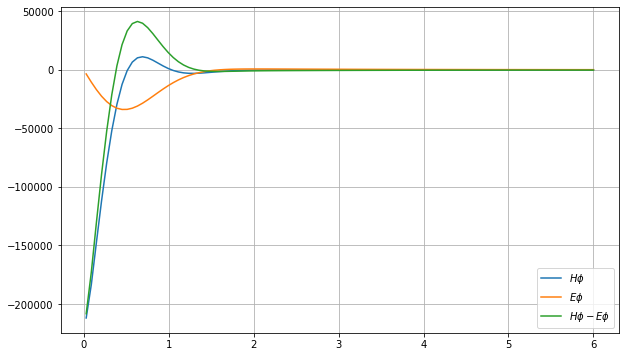

In [7]:
f1 = lambda r: r*torch.exp(-beta*r) 
f2 = lambda r: r*torch.exp(-beta*r) * model.forward(R_train) 
plt.figure(figsize=(10,6))
#plt.plot(R_train.detach().numpy(), Phi_0.detach().numpy(), label="$\phi_0$")
model = NeuralNetwork()
initialize_weights(model)
#plt.plot(R_train.detach().numpy(),f1(R_train).detach().numpy())
#plt.plot(R_train.detach().numpy(),f2(R_train).detach().numpy())
R_train.requires_grad = True
Phi = Phi_t(R_train)  
#plt.plot(R_train.detach().numpy(), Phi_aux(R_train).detach().numpy(), ".", label="$\phi_{aux}$")
#integral = Phi_0*torch.trapezoid(Phi_0[100:]*Phi_aux(R_train)[100:], R_train[100:],dim=0)
#plt.plot(R_train.detach().numpy(), integral.detach().numpy(), label="integral")  
#plt.plot(R_train.detach().numpy(), Phi.detach().numpy(), label="$\phi$")
Phi_t_r = torch.autograd.grad(Phi, R_train, grad_outputs=torch.ones_like(Phi), create_graph=True)[0]
Phi_t_r_r = torch.autograd.grad(Phi_t_r, R_train, grad_outputs=torch.ones_like(Phi_t_r), create_graph=True)[0]
H_Phi = -(hbar**2/(2*m))*Phi_t_r_r + (l*(l+1)*hbar**2/(2*m*R_train**2) + V(R_train))*Phi
plt.plot(R_train.detach().numpy()[100:], H_Phi.detach().numpy()[100:], label="$H\phi$")    
norm_sqr = torch.trapezoid(Phi[100:]**2,R_train[100:],dim=0) # integral over r=0 to 6
print("norm = ",norm_sqr)
prom = Phi.size()[0]
global E
E = torch.trapezoid(Phi[100:]*H_Phi[100:],R_train[100:],dim=0)/norm_sqr 
print("energy = ",E)
plt.plot(R_train.detach().numpy()[100:], E.detach().numpy()*Phi.detach().numpy()[100:], label="$E\phi$")
plt.plot(R_train.detach().numpy()[100:], H_Phi.detach().numpy()[100:] - E.detach().numpy()*Phi.detach().numpy()[100:], 
                                                        label="$H\phi-E\phi$")
loss = (torch.mean((H_Phi[100:] - E*Phi[100:])**2)*prom)#/norm_sqr
print("loss = ",loss)
#plt.xlim(-1,6)
#plt.ylim(-1,1)
plt.grid()
plt.legend()
plt.show()

tensor([[26.0017],
        [25.9341],
        [25.8657],
        [25.7964],
        [25.7263],
        [25.6554],
        [25.5837],
        [25.5111],
        [25.4377],
        [25.3634],
        [25.2883],
        [25.2123],
        [25.1355],
        [25.0578],
        [24.9793],
        [24.8999],
        [24.8197],
        [24.7386],
        [24.6566],
        [24.5737],
        [24.4900],
        [24.4054],
        [24.3199],
        [24.2336],
        [24.1464],
        [24.0583],
        [23.9694],
        [23.8795],
        [23.7889],
        [23.6973],
        [23.6049],
        [23.5116],
        [23.4174],
        [23.3224],
        [23.2265],
        [23.1298],
        [23.0322],
        [22.9338],
        [22.8345],
        [22.7344],
        [22.6334],
        [22.5316],
        [22.4290],
        [22.3255],
        [22.2213],
        [22.1162],
        [22.0103],
        [21.9037],
        [21.7962],
        [21.6880],
        [21.5790],
        [21.4692],
        [21.

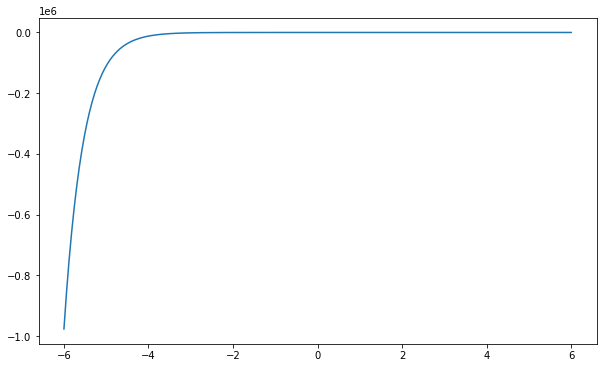

In [8]:
rr = np.linspace(-6,6,200)
plt.figure(figsize=(10,6))
plt.plot(rr, rr*np.exp(-beta*rr), label="$\phi_0$")
print(model.forward(R_train))

In [9]:
def loss_fn(r):
    r.requires_grad = True
    
    Phi = Phi_t(r)    
    Phi_t_r = torch.autograd.grad(Phi, r, grad_outputs=torch.ones_like(Phi), create_graph=True)[0]
    Phi_t_r_r = torch.autograd.grad(Phi_t_r, r, grad_outputs=torch.ones_like(Phi_t_r), create_graph=True)[0]
    H_Phi = -(hbar**2/(2*m))*Phi_t_r_r + (l*(l+1)*hbar**2/(2*m*r**2) + V(r))*Phi
    
    norm = torch.trapezoid(Phi[100:]**2,r[100:],dim=0) # integral over r=0 to 6

    prom = Phi.size()[0]
    
    global E
    E = torch.trapezoid(Phi[100:]*H_Phi[100:],r[100:],dim=0)/norm 
    
    
    return (torch.mean((H_Phi[100:] - E*Phi[100:])**2)*prom)#/norm #multiply by m to avoit division by m in the mean function of torh 

In [10]:
upper_r = 6
lower_r = -6
steps = 200
R_train = torch.Tensor(np.linspace(lower_r, upper_r, steps)[:,None])
epoch = 50000
lr1 = 4e-3
lr2 = 8e-4 
Phis_t = []
Es = []
lss = []
epochs = []



start = time.time()

model = NeuralNetwork().to(device)
initialize_weights(model)
optimizer = torch.optim.Adam(model.parameters(), lr=lr1)
for t in range(epoch):
    loss = loss_fn(R_train.to(device))
    print(f"Epoch {t+1}\n ---------------------- loss: {loss}")
    training(R_train, loss_fn, optimizer)
    if t%100 == 0:
        Phis_t.append(Phi_t(R_train).detach().numpy())
        Es.append(E.detach().numpy())
        lss.append(loss.detach().numpy())
        epochs.append(t)
        if t == int(epoch/2):
            lr1 = lr2    
'''optimizer = torch.optim.Adam(model.parameters(), lr=lr2)
for t in range(int(epoch/2)+1,epoch):
    loss = loss_fn(R_train.to(device))
    print(f"Epoch {t+1}\n ---------------------- loss: {loss}")
    training(R_train, loss_fn, optimizer)
    if t%100 == 0:
        Phis_t.append(Phi_t(R_train).detach().numpy())
        Es.append(E.detach().numpy())
        lss.append(loss.detach().numpy())
        epochs.append(t)'''
Es = np.squeeze(Es)
lss = np.squeeze(lss)
Phis_t = np.squeeze(Phis_t)
print("Done!")

end = time.time()
print(end - start)

Epoch 1
 ---------------------- loss: 50827948032.0
Epoch 2
 ---------------------- loss: 49864540160.0
Epoch 3
 ---------------------- loss: 48910823424.0
Epoch 4
 ---------------------- loss: 47966994432.0
Epoch 5
 ---------------------- loss: 47033135104.0
Epoch 6
 ---------------------- loss: 46109454336.0
Epoch 7
 ---------------------- loss: 45196058624.0
Epoch 8
 ---------------------- loss: 44293124096.0
Epoch 9
 ---------------------- loss: 43400744960.0
Epoch 10
 ---------------------- loss: 42519080960.0
Epoch 11
 ---------------------- loss: 41648218112.0
Epoch 12
 ---------------------- loss: 40788258816.0
Epoch 13
 ---------------------- loss: 39939309568.0
Epoch 14
 ---------------------- loss: 39101476864.0
Epoch 15
 ---------------------- loss: 38274809856.0
Epoch 16
 ---------------------- loss: 37459382272.0
Epoch 17
 ---------------------- loss: 36655292416.0
Epoch 18
 ---------------------- loss: 35862560768.0
Epoch 19
 ---------------------- loss: 35081244672.0
Ep

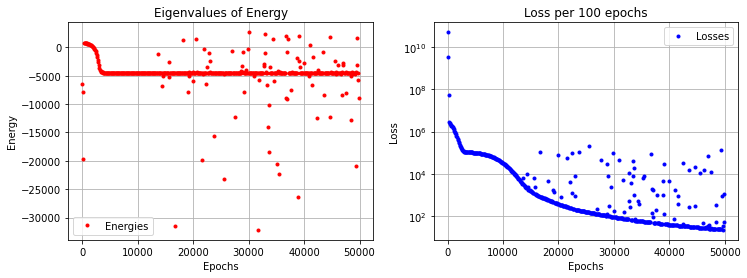

In [11]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
plt.plot(epochs, Es, "r.", label="Energies")
plt.title("Eigenvalues of Energy")
#plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Energy")
plt.grid()
plt.legend(loc="best")
plt.subplot(122)
plt.plot(epochs, lss, "b.", label="Losses")
plt.title("Loss per 100 epochs")
plt.yscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend(loc="best")
plt.show()

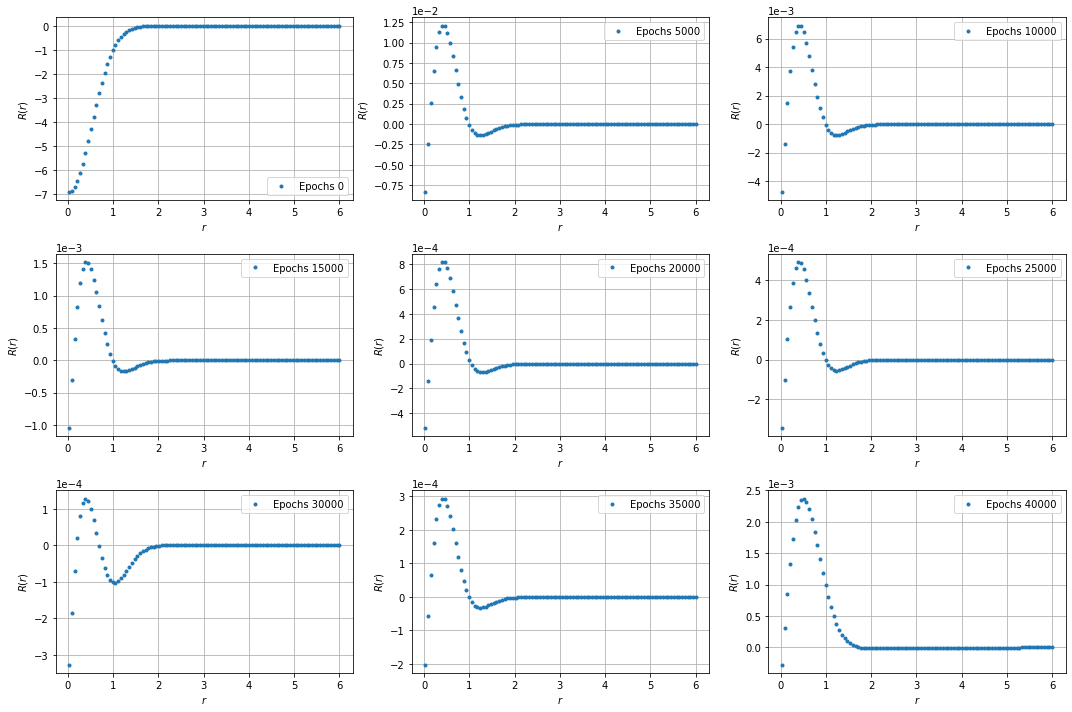

In [12]:
rr = np.linspace(lower_r, upper_r, steps)[:,None]
fig, axs = plt.subplots(3,3,figsize=(15,10))

fil = 0
col = 0
for i in range(0,9):
    yy = Phis_t[50*i]
    yy = yy.reshape((200,1))
    axs[fil,col].plot(rr[100:], np.divide(yy[100:], rr[100:]), ".", label=f"Epochs {epochs[50*i]}")
    axs[fil,col].set_xlabel("$r$")
    axs[fil,col].set_ylabel("$R(r)$")
    axs[fil,col].legend(loc="best")
    axs[fil,col].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[fil,col].grid()
    if col == 2:
       col = 0
       fil = fil+1
    else:
       col = col+1
plt.tight_layout()
plt.show()  

In [13]:
Es

array([-6.4340757e+03, -7.8148804e+03, -1.9638844e+04,  8.3285474e+02,
        7.3654480e+02,  7.2506378e+02,  7.1122333e+02,  6.9518201e+02,
        6.7660602e+02,  6.5495361e+02,  6.3001276e+02,  6.0131244e+02,
        5.6811554e+02,  5.2976123e+02,  4.8516177e+02,  4.3331445e+02,
        3.7296362e+02,  3.0209415e+02,  2.1911153e+02,  1.2093127e+02,
        4.8468909e+00, -1.3348134e+02, -2.9849637e+02, -4.9573257e+02,
       -7.3192688e+02, -1.0140576e+03, -1.3484762e+03, -1.7392164e+03,
       -2.1838647e+03, -2.6666772e+03, -3.1509397e+03, -3.5864185e+03,
       -3.9264031e+03, -4.1570684e+03, -4.2970117e+03, -4.3749736e+03,
       -4.4166123e+03, -4.4375361e+03, -4.4481343e+03, -4.4528076e+03,
       -4.4551104e+03, -4.4556885e+03, -4.4562632e+03, -4.4563042e+03,
       -4.4564922e+03, -4.4561860e+03, -4.4562842e+03, -4.4566143e+03,
       -4.4561582e+03, -4.4569507e+03, -4.4561777e+03, -4.4559712e+03,
       -4.4556729e+03, -4.4555166e+03, -4.4556045e+03, -4.4548501e+03,
      

In [14]:
np.mean(Es)

-4590.3525